importing the necessary libraries


In [63]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
import numpy as numpy
from glob import glob
import matplotlib.pyplot as plt

#resizing all image to standard size for input




In [3]:
IMAGE_SiZE = [224, 224]

train_path = 'Dataset\train'
test_path = 'Dataset\test'

In [4]:

#importing resNet50 and removing outer layer of Resnet50
#using pretrained weight of imageNet

resnet = ResNet50(input_shape=IMAGE_SiZE + [3], weights='imagenet', include_top= False)

for layer in resnet.layers:
    layer.trainable = False


94765736/94765736 [==============================] - 13s 0us/step


In [5]:
#for getting no of output class that will be given in our model

folders = glob('Dataset/train/*')

In [7]:
#flattening our layer so that we can add output layer 

x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation = 'softmax')(x)
                                                    

In [9]:
#creating my model Object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
#structure of model

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [12]:
#loss function and optimizer for model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [13]:
#Data Augmentation 

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    shear_range = 0.2,
                                    zoom_range= 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)
                                
test_datagen = ImageDataGenerator( rescale = 1.0/255)

In [16]:
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                target_size = [224, 224],
                                                batch_size = 32,
                                                class_mode = 'categorical' )


test_set = train_datagen.flow_from_directory('Dataset/test',
                                                target_size = [224, 224],
                                                batch_size = 32,
                                                class_mode = 'categorical' )

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [18]:
#fitting the model

r = model.fit_generator(training_set,
                       validation_data = test_set,
                       epochs = 20,
                       steps_per_epoch = len(training_set),
                       validation_steps = len(test_set)
                       )

C:\Users\admin\AppData\Local\Temp\ipykernel_5884\1486486160.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,


Epoch 1/20
61/61 [==============================] - 228s 4s/step - loss: 2.8317 - accuracy: 0.3844 - val_loss: 1.5372 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 227s 4s/step - loss: 1.0664 - accuracy: 0.5618 - val_loss: 1.0900 - val_accuracy: 0.3889
Epoch 3/20
61/61 [==============================] - 228s 4s/step - loss: 1.0138 - accuracy: 0.5894 - val_loss: 1.4500 - val_accuracy: 0.5000
Epoch 4/20
61/61 [==============================] - 229s 4s/step - loss: 1.1198 - accuracy: 0.5823 - val_loss: 1.0240 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 227s 4s/step - loss: 0.9416 - accuracy: 0.6310 - val_loss: 1.0218 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 228s 4s/step - loss: 0.9937 - accuracy: 0.6315 - val_loss: 1.1124 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 235s 4s/step - loss: 0.9382 - accuracy: 0.6294 - val_loss: 0.5674 - val_accuracy: 0.7778
Epoch 8/20
61

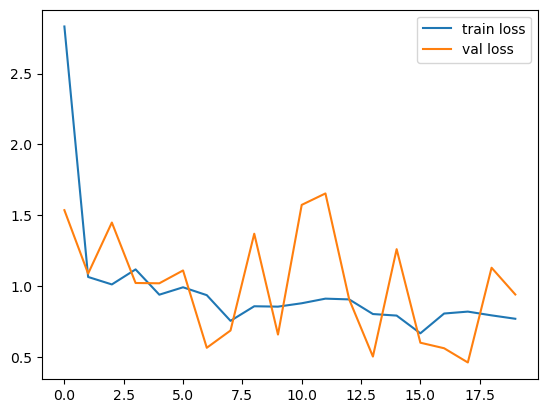

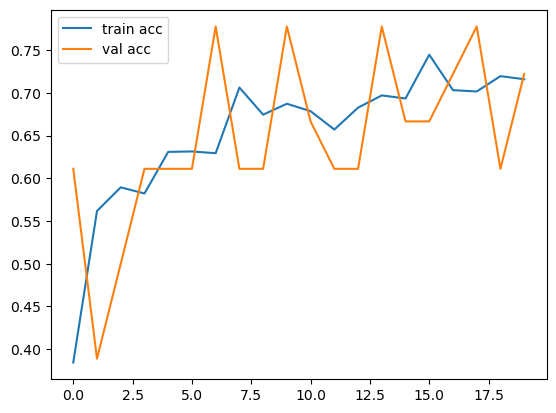

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
#PREDICTION 


y_pred = model.predict(test_set)

1/1 [==============================] - 7s 7s/step


In [24]:
y_pred

array([[3.07374191e-03, 6.64345035e-03, 9.89524841e-01, 7.57955131e-04],
       [2.10883185e-01, 7.55329251e-01, 2.97887716e-02, 3.99881136e-03],
       [1.95230953e-02, 1.57743273e-03, 9.78690267e-01, 2.09169273e-04],
       [9.99934673e-01, 6.01352440e-05, 2.28185695e-06, 2.89098739e-06],
       [3.96684632e-02, 8.24211895e-01, 4.00835425e-02, 9.60360542e-02],
       [4.50589182e-03, 9.74560440e-01, 9.26193036e-03, 1.16716884e-02],
       [6.56839430e-01, 3.29227209e-01, 1.12176295e-02, 2.71576713e-03],
       [1.19026944e-01, 9.50524807e-02, 7.63997614e-01, 2.19230279e-02],
       [8.34322393e-01, 2.75308676e-02, 1.57823041e-03, 1.36568442e-01],
       [8.59047286e-03, 9.24852788e-01, 5.14157536e-03, 6.14151582e-02],
       [1.21626548e-01, 8.07285547e-01, 3.94338043e-03, 6.71446100e-02],
       [1.49891749e-02, 9.81147051e-01, 8.10255355e-04, 3.05348891e-03],
       [1.41032144e-01, 7.20384240e-01, 9.04622152e-02, 4.81214337e-02],
       [7.44913646e-04, 1.50878460e-03, 9.97723877e

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 3, 1, 2, 1], dtype=int64)

In [44]:
# prediction using model

from keras.models import load_model
from keras.preprocessing import image

In [45]:
model=load_model('model_resnet50.h5')

In [47]:
img=image.load_img('C:/Users/admin/Desktop/Cotton Disease Model Transfer Learning/Dataset/test/diseased cotton plant/dd (41).jpg',target_size=(224,224))

In [50]:
#prediction parameter should be numpy array
x=image.img_to_array(img)
x

array([[[ 97.,  82.,  61.],
        [ 71.,  59.,  37.],
        [ 98.,  83.,  62.],
        ...,
        [ 89., 149.,  63.],
        [ 91., 154.,  63.],
        [ 92., 154.,  68.]],

       [[ 63.,  54.,  37.],
        [ 54.,  46.,  33.],
        [ 68.,  59.,  42.],
        ...,
        [ 88., 150.,  64.],
        [ 89., 152.,  63.],
        [ 82., 144.,  58.]],

       [[ 48.,  38.,  26.],
        [ 58.,  49.,  34.],
        [ 76.,  67.,  50.],
        ...,
        [ 93., 153.,  67.],
        [ 82., 145.,  56.],
        [ 90., 150.,  64.]],

       ...,

       [[ 54.,  47.,  29.],
        [ 52.,  47.,  28.],
        [ 57.,  50.,  32.],
        ...,
        [ 38.,  38.,  26.],
        [ 36.,  34.,  22.],
        [ 50.,  46.,  34.]],

       [[ 58.,  51.,  35.],
        [ 34.,  31.,  14.],
        [ 50.,  44.,  28.],
        ...,
        [ 68.,  62.,  46.],
        [ 41.,  38.,  23.],
        [ 44.,  38.,  26.]],

       [[ 63.,  69.,  35.],
        [ 41.,  38.,  21.],
        [ 29.,  

In [53]:
model.input_shape

(None, 224, 224, 3)

In [51]:
x.shape

(224, 224, 3)

In [55]:
x = x/255

In [56]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[9.1419606e-05, 5.3618072e-25, 9.9990857e-01, 2.7607050e-26]],
      dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 260ms/step


In [62]:
a

array([2], dtype=int64)